# Dependencies

In [131]:
# Required to see plots when running on mybinder
import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# Python standard-libraries to download data from the web
from urllib.parse import urlencode
from urllib.request import urlretrieve

#Some astropy submodules that you know already
from astropy import units as u
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy.io import fits

#only here to display images
from IPython.display import Image

# These are the new modules for this notebook
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS

wave_obs = 10 ** torch.arange(3.578, 3.97, 0.0001)

# Huggingface Dataset

In [132]:
# Load dataset
dataset = load_dataset('sdss_dataset.py', cache_dir='/mnt/home/lparker/ceph/huggingface/sdss_spectra')

In [161]:
# Examine
dataset['train']

Dataset({
    features: ['spec', 'ivar', 'target_id', 'z', 'zerr', 'obj_ra', 'obj_dec'],
    num_rows: 1280000
})

In [162]:
dataset['test']

Dataset({
    features: ['spec', 'ivar', 'target_id', 'z', 'zerr', 'obj_ra', 'obj_dec'],
    num_rows: 320000
})

Text(0.5, 1.0, 'Spectrum for Selected Galaxy')

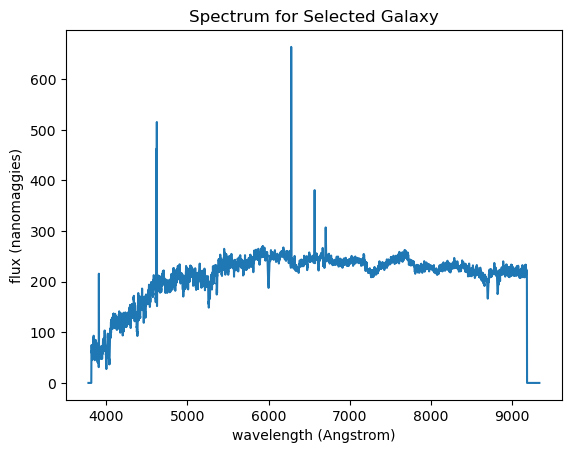

In [163]:
# Let's look at the spectrum from the galaxy set
plt.plot(wave_obs, galaxy['spec'])
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('flux (nanomaggies)')
plt.title('Spectrum for Selected Galaxy')

Text(0.5, 1.0, 'Inverse Variance on Readings for Selected Galaxy')

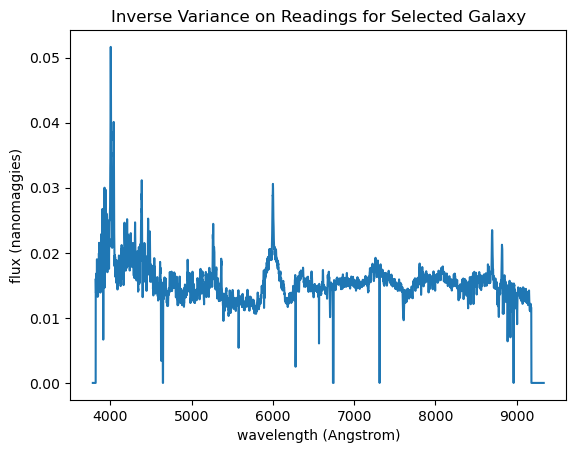

In [164]:
# Metadata: Variance on Readings (ivar = 0 where readings are deemed failures on spectrometer)
plt.plot(wave_obs, galaxy['ivar'])
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('flux (nanomaggies)')
plt.title('Inverse Variance on Readings for Selected Galaxy')

In [159]:
# Let's look at the galaxy!
ra = galaxy['obj_ra']*u.deg
dec = galaxy['obj_dec']*u.deg
pos = coords.SkyCoord(ra, dec, frame='icrs')

im_size = 3*u.arcmin # get a 25 arcmin square
im_pixels = 1024
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=ra.value,
                              dec=dec.value,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# this downloads the image
image_name = str(1069455)+'_SDSS_cutout.jpg'
urlretrieve(url, image_name)

('1069455_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x15402c1b72e0>)

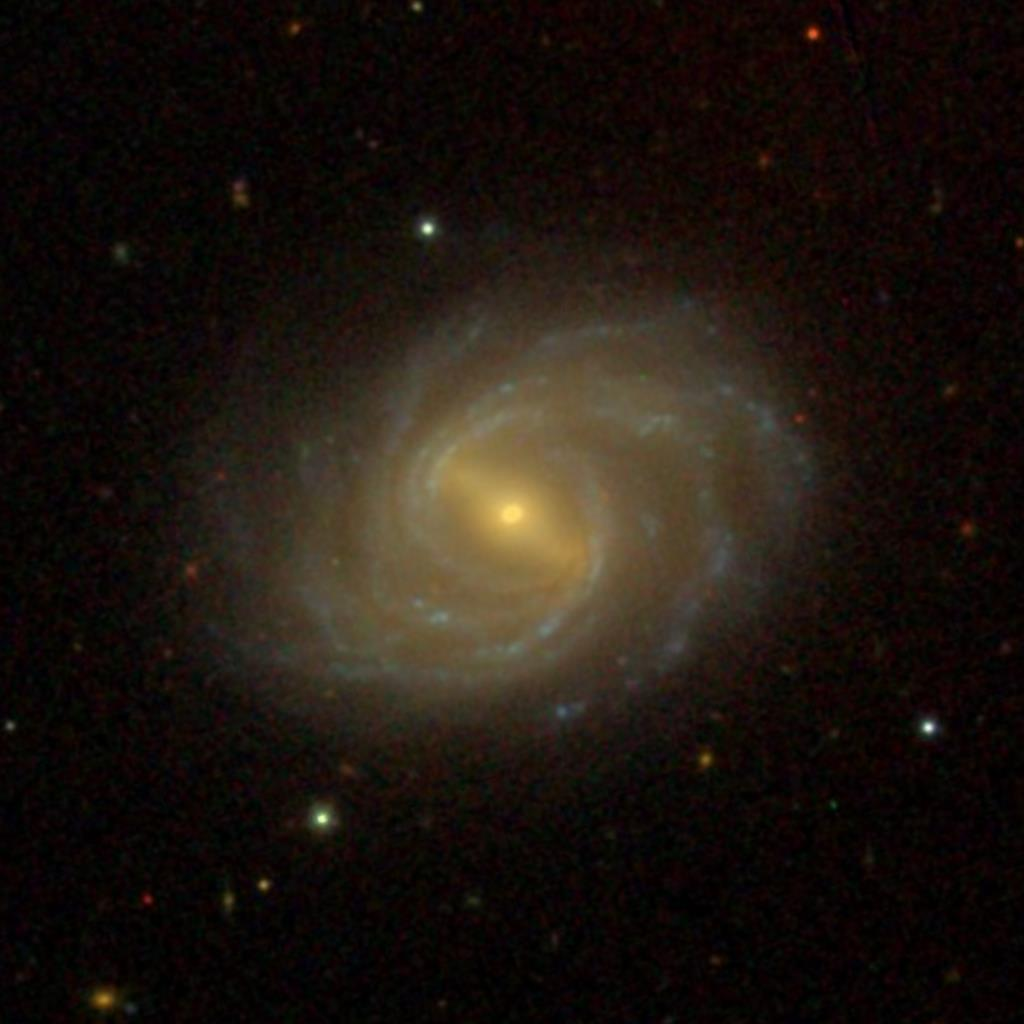

In [160]:
# Load the image into the notebook
Image(image_name)

# Actual Organization
The actual organiation is as follows: there is one file "merged.h5" that contains 9 groups (each with ~200k spectra) with the datasets listed above

In [172]:
f = h5py.File('/mnt/home/lparker/ceph/sdss_spectra/merged.h5')

f['0'].keys()

<KeysViewHDF5 ['ivar', 'obj_dec', 'obj_ra', 'spec', 'target_id', 'z', 'zerr']>

In accompaniment of the spectrum dataset h5 file, we also have an astropy table that contains a limited amount of information

In [191]:
from astropy.table import Table
table = table.read('/mnt/home/lparker/ceph/sdss_spectra/merged.dat', format='ascii')
table

target_id,obj_ra,obj_dec,group,index
float64,float64,float64,float64,float64
1131677737615556.0,197.0868,63.923044,0.0,0.0
1131677200613470.0,196.07703,63.532701,0.0,1.0
1131679348097155.0,196.85635,65.30123,0.0,2.0
1131677737418796.0,195.91257,63.9684,0.0,3.0
8928171983720.0,196.08857,65.56477,0.0,4.0
1131677201072173.0,198.4806,63.490717,0.0,5.0
8925488152671.0,197.99107,63.221916,0.0,6.0
1131678274355256.0,196.37445,64.456199,0.0,7.0
1131678274093254.0,195.11957,64.51333,0.0,8.0
